# Notebook for applying algorithm to the Iris dataset  
Made by Rafael Mendonça Duarte (rmduarte@usp.br)  
Based on “Machine Learning with PyTorch and Scikit-Learn,” using scikit-learn’s algorithems implementation

In [2]:
# download iris dataset

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we only take the last two features.
y = iris.target
print('Classes:', np.unique(y))

Classes: [0 1 2]


In [3]:
# separate the train and test sets
from sklearn.model_selection import train_test_split

# the function train_test_split will split arrays or matrices into random train and test subsets.
# the stratify parameter makes a split so that the proportion of values in the sample produced will
#     be the same as the proportion of values provided to parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Use numpy bincount to count the number of occurrences of each value in an array of non-negative ints to verify
#     that the class proportions are maintained in the train and test sets

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
# feature scaling may be required for some machine learning algorithms to perform well.
# Standardization is a common requirement for machine learning estimators implemented in scikit-learn;
# they might behave badly if the individual features do not more or less look like standard normally distributed data
# (e.g., Gaussian with 0 mean and unit variance).

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# train a perceptron model
# Most of the algorithms in scikit-learn suport multiclass classifications by default using the one-vs-rest (OvR) scheme.

from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,1


In [6]:
# predict the test set results
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [7]:
# accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


C:\Users\duart\directory\Machine-Learning\plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


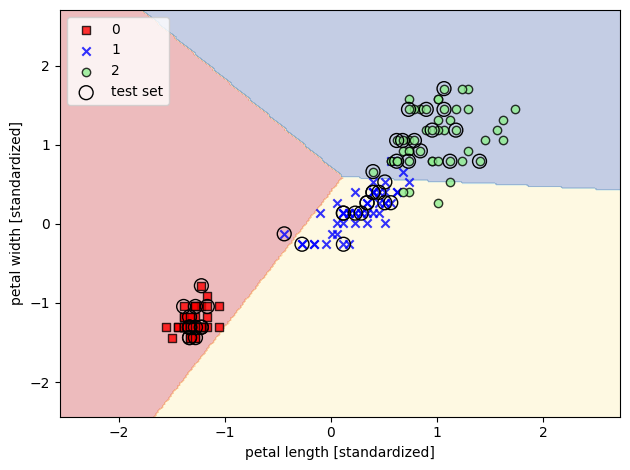

In [8]:
from matplotlib import pyplot as plt
import sys
sys.path.append('C:\\Users\\duart\\directory\\Machine-Learning')  # ou o caminho absoluto para o diretório raiz
import plot_decision_regions as pdr

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
pdr.plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Training a Logistic Regression Model

c:\Users\duart\directory\Machine-Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\duart\directory\Machine-Learning\plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


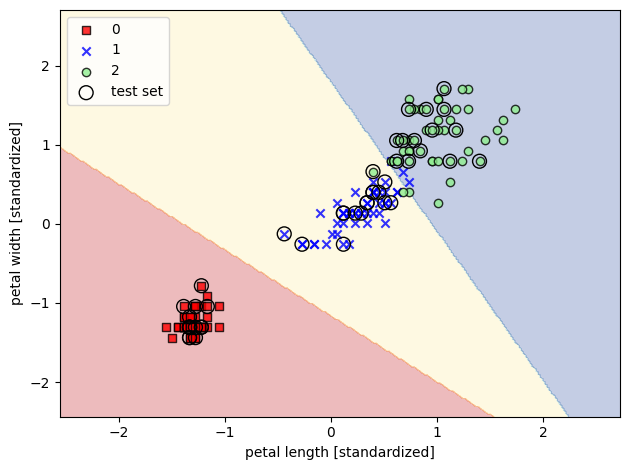

In [9]:
from sklearn.linear_model import LogisticRegression
import plot_decision_regions as pdr

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)
pdr.plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Training a Suppont Vector Machine Model



C:\Users\duart\directory\Machine-Learning\plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


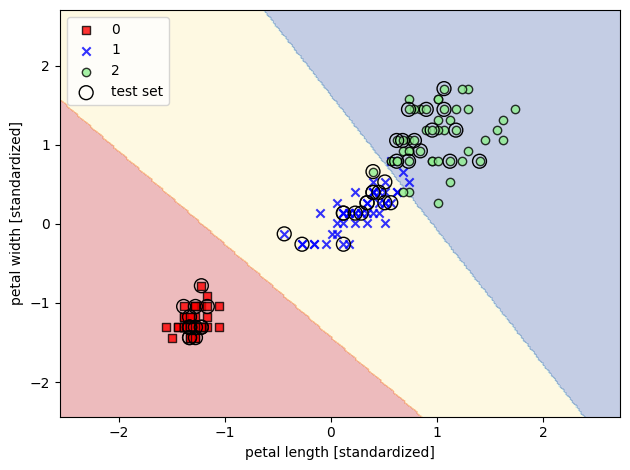

In [10]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=10.0, random_state=1)
svm.fit(X_train_std, y_train)
pdr.plot_decision_regions(X_combined_std, y_combined, 
                          classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\duart\directory\Machine-Learning\plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


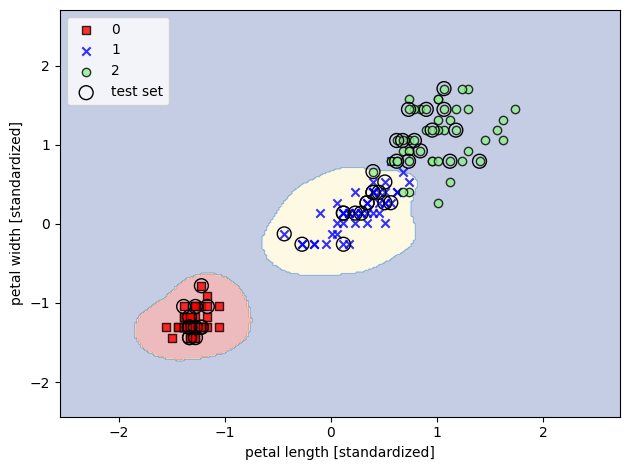

In [11]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1, gamma=10)
svm.fit(X_train_std, y_train)
pdr.plot_decision_regions(X_combined_std, y_combined, 
                          classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Building a decision tree

C:\Users\duart\directory\Machine-Learning\plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


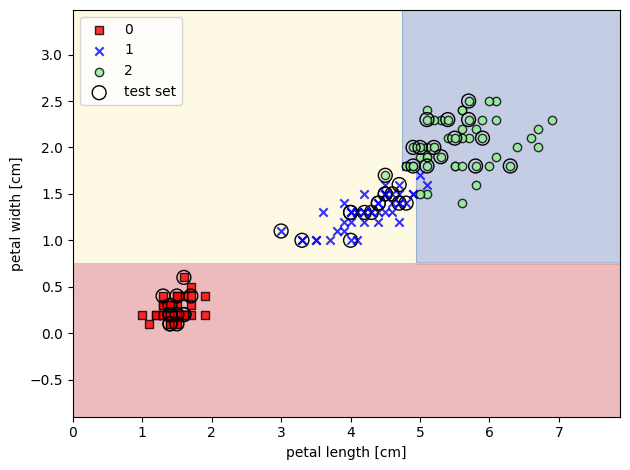

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
pdr.plot_decision_regions(X_combined, y_combined, 
                          classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


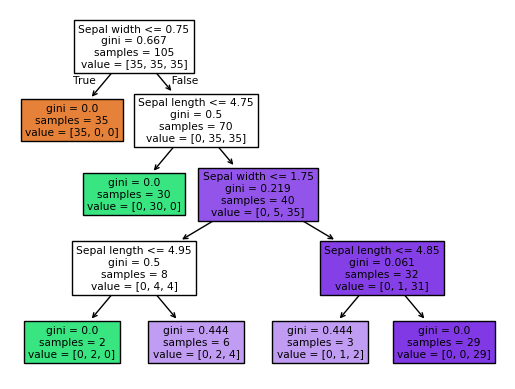

In [13]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 
                 'Petal length', 'Petal width']

tree.plot_tree(tree_model, 
               feature_names=feature_names,
                filled=True)
plt.show()

# Random Forest

C:\Users\duart\directory\Machine-Learning\plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


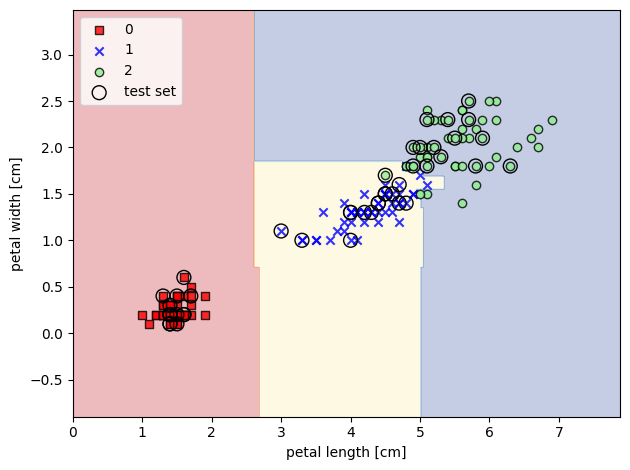

Misclassified samples: 1
Accuracy: 0.98


In [16]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
pdr.plot_decision_regions(X_combined, y_combined,
                            classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# accuracy_score
y_pred = forest.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))